In [163]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
session = plot_oa('D:/obstacle_avoidance/metadata/101222_101322_101422.json')
session.gather_session_df()
session.process_df()
df = session.df

In [14]:
## plot traces by cluster/animal
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_cluster_trace'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    print(animal)
    by_label = animal_frame.groupby(['cluster_label'])
    for cluster,cluster_frame in by_label:
        print(cluster)

J19LT
0
1
2
3
4
5
6
7
8
J19RT
0
1
2
3
4
5
6
7
8
J20LT
0
1
2
3
4
5
6
7
8
J20RT
0
1
2
3
4
5
6
7
8


In [72]:
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_direction = animal_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        print(animal,direction)

J19LT False
J19LT True
J19RT False
J19RT True
J20LT False
J20LT True
J20RT False
J20RT True


In [36]:
## plot traces by cluster/animal
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_cluster_trace'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_direction = animal_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
        if direction == False:
            fig.suptitle('Right Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            right_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in right_by_cluster:
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    plt.gca().set_title(str(cluster))
                    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
               

        if direction ==True:
            fig.suptitle('Left Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            left_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in left_by_cluster:
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    plt.gca().set_title(str(cluster))
                    plt.subplot(3,3,cluster+1)
                    plt.gca().set_title(str(cluster))
                    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
            
pdf.close()





In [338]:
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_head_body direction1'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_cluster = animal_frame.groupby(['cluster_label'])
    for cluster,cluster_frame in by_cluster:
        cluster_frame = cluster_frame.reset_index()
        y = nearestX_roundup(len(cluster_frame),4)
        fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(cluster_frame)),dpi = 100)
        fig.suptitle(str(cluster) + '_' +str(animal) , size = 20)
        for ind,row in cluster_frame.iterrows():
            plt.subplot(int((y/4)),4,ind+1)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_title(str(row['odd'])+str(ind))
            for indx,i in enumerate(row['head_angle']):
                    current_ang = i
                    x1 = row['ts_nose_x_cm'][indx]
                    y1 = row['ts_nose_y_cm'][indx]
                    x2 = x1+3 * np.cos(current_ang)
                    y2 = y1+3* np.sin(current_ang)
                    plt.plot((x1,x2), (y1,y2), '-',color = 'black',alpha=0.3)
            for indx,i in enumerate(row['body_angle']):
                    current_ang = i
                    x1 = row['ts_spine_x_cm'][indx]
                    y1 = row['ts_spine_y_cm'][indx]
                    x2 = x1+3 * np.cos(current_ang)
                    y2 = y1+3* np.sin(current_ang)
                    plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                        [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')


            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                    [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')

            sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = enumerate(row['obstacle_intersect_nose_x']), palette ='magma',legend=False)    
            plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
            plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
            plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
            plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
            plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            plt.scatter(row['ts_nose_x_cm'],row['ts_nose_y_cm'], color = 'c',s=1000)
            plt.scatter(row['ts_spine_x_cm'],row['ts_spine_y_cm'], color = 'm',s=1000)

            plt.ylim([52,0]); plt.xlim([0, 72])
        pdf.savefig(); plt.close()
pdf.close()


    
    

In [166]:
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    if animal == 'J20RT':
        df1 = animal_frame


In [91]:
df1

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,body_angle,head_angle,obstacle_edge_mid_x_cm,obstacle_edge_mid_y_cm,obstacle_intersect_spine_x,obstacle_intersect_spine_y,all_obstacle_intersect_nose_x,all_obstacle_intersect_nose_y,obstacle_intersect_nose_x,obstacle_intersect_nose_y
245,56396.382105,56401.703283,"[56396.387507, 56396.404108, 56396.420454, 563...","[264, 265, 266, 267, 268, 269, 270, 271, 272, ...","[112.0492172241211, 111.85668182373047, 111.71...","[263.0643615722656, 262.69403076171875, 262.92...","[0.9999997615814209, 0.9999996423721313, 0.999...","[123.26714324951172, 122.17658996582031, 122.3...","[273.4779052734375, 273.4393615722656, 273.583...","[0.9999998807907104, 0.9999997615814209, 0.999...",...,"[2.1246260435150037, 2.1738110547466842, 2.195...","[2.139470020555825, 2.161499328211793, 2.18585...",34.491650,25.015566,[],"[nan, nan]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[nan, nan, nan, nan, nan, nan, nan, 34.6573043...","[nan, nan, nan, nan, nan, nan, nan, 14.0914377..."
246,56401.703283,56405.103193,"[56401.705612, 56401.722419, 56401.73966, 5640...","[[583, 584, 585, 586, 587, 588, 589, 590, 591,...","[567.846923828125, 567.9541015625, 567.9830932...","[261.62213134765625, 261.7710266113281, 261.85...","[0.9999982118606567, 0.9999979734420776, 0.999...","[559.8572998046875, 560.25341796875, 560.58520...","[249.90591430664062, 250.23562622070312, 250.2...","[0.9999986886978149, 0.9999984502792358, 0.999...",...,"[-1.2999146763347598, -1.1896132978595317, -1....","[-0.6894644651287857, -0.6745131003672536, -0....",39.287183,25.165562,[],[],"[0.0, 0.0, 0.0, 39.171964766103855, 39.1872509...","[0.0, 0.0, 0.0, 36.575057946054, 35.0613403014...","[39.171964766103855, 39.187250967966506, 39.19...","[36.575057946054, 35.061340301420366, 34.46040..."
247,56405.103193,56415.839680,"[56405.106944, 56405.123494, 56405.141068, 564...","[787, 788, 789, 790, 791, 792, 793, 794, 795, ...","[112.341796875, 112.5261459350586, 112.2376403...","[262.132080078125, 261.9194030761719, 262.1935...","[0.9999998807907104, 0.9999998807907104, 0.999...","[124.35699462890625, 124.48033905029297, 124.6...","[271.0626525878906, 270.6658020019531, 271.431...","[0.9999998807907104, 0.9999998807907104, 0.999...",...,"[1.504031652371819, 1.6451124501240244, 1.7814...","[1.896738727311622, 1.9824265600299151, 2.1122...",25.633600,26.022333,"[19.78460906107649, 18.701065636148265, 18.841...","[19.78460906107649, 18.701065636148265, 18.841...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.566215492398214, 25.57275307954447, 25.586...","[14.22569768356614, 15.370191640719478, 17.705..."
248,56415.839680,56420.066956,"[56415.843865, 56415.861337, 56415.877235, 564...","[[1431, 1432, 1433, 1434, 1435, 1436, 1437, 14...","[569.6924438476562, 570.3181762695312, 570.292...","[260.84686279296875, 260.5827941894531, 260.42...","[0.9999996423721313, 0.9999996423721313, 0.999...","[554.6183471679688, 554.9428100585938, 555.338...","[254.00350952148438, 254.08241271972656, 254.0...","[0.9999994039535522, 0.9999994039535522, 0.999...",...,"[-1.4319919350447348, -1.4718576645426058, -1....","[-0.9243926671891026, -0.9557880470971687, -0....",30.256760,26.125097,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[30.392652729768674, 30.39295684765123, 30.376...","[37.02545389936552, 37.049848086486506, 35.755..."
249,56420.066956,56430.414502,"[56420.078784, 56420.095475, 56420.112051, 564...","[1685, 1686, 1687, 1688, 1689, 1690, 1691, 169...","[112.79441833496094, 113.09716796875, 113.1911...","[262.7314453125, 263.1336364746094, 263.659088...","[0.9999998807907104, 0.9999998807907104, 0.999...","[122.4262924194336, 122.25873565673828, 122.77...","[274.2384338378906, 274.768981933

(array([54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.]),
 array([-0.33112582, -0.28300075, -0.23487567, -0.18675059, -0.13862552,
        -0.09050044, -0.04237536,  0.00574971,  0.05387479,  0.10199986,
         0.15012494]),
 <BarContainer object of 10 artists>)

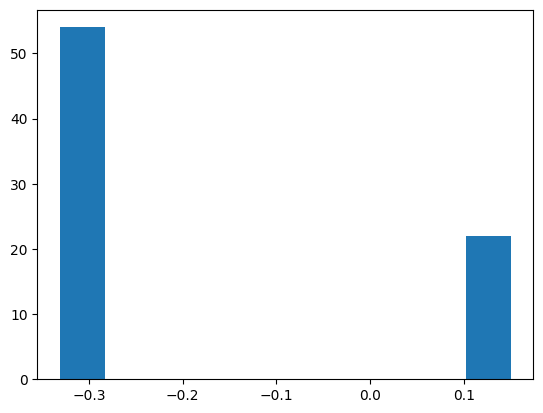

In [75]:
#df1.loc[246,'obstacle_intersect_nose_y']-
plt.hist(((df1.loc[246,'obstacle_intersect_nose_y'] -  df1.loc[246,'obstacle_edge_mid_y_cm']))/len(df1.loc[246,'obstacle_intersect_nose_y']) )

(0.0, 72.0)

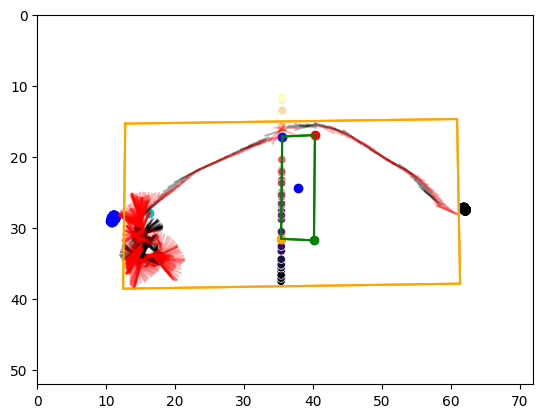

In [189]:
plt.plot([df1.loc[249,'arenaTL_x_cm'], df1.loc[249,'arenaTR_x_cm'], df1.loc[249,'arenaBR_x_cm'], df1.loc[249,'arenaBL_x_cm'],df1.loc[249,'arenaTL_x_cm']],
                [df1.loc[249,'arenaTL_y_cm'], df1.loc[249,'arenaTR_y_cm'], df1.loc[249,'arenaBR_y_cm'], df1.loc[249,'arenaBL_y_cm'],df1.loc[249,'arenaTL_y_cm']],color='orange')


plt.plot([df1.loc[249,'gt_obstacleTL_x_cm'], df1.loc[249,'gt_obstacleTR_x_cm'], df1.loc[249,'gt_obstacleBR_x_cm'], df1.loc[249,'gt_obstacleBL_x_cm'],df1.loc[249,'gt_obstacleTL_x_cm']],
                [df1.loc[249,'gt_obstacleTL_y_cm'], df1.loc[249,'gt_obstacleTR_y_cm'], df1.loc[249,'gt_obstacleBR_y_cm'], df1.loc[249,'gt_obstacleBL_y_cm'],df1.loc[249,'gt_obstacleTL_y_cm']],color='green')



for ind,i in enumerate(df1.loc[249,'body_angle']):

    current_ang = i
    x1 = df1.loc[249,'ts_spine_x_cm'][ind]
    y1 = df1.loc[249,'ts_spine_y_cm'][ind]
    x2 = x1+3 * np.cos(current_ang)
    y2 = y1+3* np.sin(current_ang)
    plt.plot((x1,x2), (y1,y2), '-',color = 'black',alpha=0.3)
    #plt.scatter(x1,y1,color = 'r',marker = '.')
    #plt.scatter(x2,y2,color = 'b',marker = '<')
    #sns.scatterplot(x=(x1,x2),y=(y1,y2),hue = enumerate(df1.loc[249,'ts_nose_x_cm']),palette ='magma',legend=False)
for ind,i in enumerate(df1.loc[249,'head_angle']):

    current_ang = i
    x1 = df1.loc[249,'ts_nose_x_cm'][ind]
    y1 = df1.loc[249,'ts_nose_y_cm'][ind]
    x2 = x1+3 * np.cos(current_ang)
    y2 = y1+3* np.sin(current_ang)
    plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)
plt.plot([df1.loc[249,'arenaTL_x_cm'], df1.loc[249,'arenaTR_x_cm'], df1.loc[249,'arenaBR_x_cm'], df1.loc[249,'arenaBL_x_cm'],df1.loc[249,'arenaTL_x_cm']],
                [df1.loc[249,'arenaTL_y_cm'], df1.loc[249,'arenaTR_y_cm'], df1.loc[249,'arenaBR_y_cm'], df1.loc[249,'arenaBL_y_cm'],df1.loc[249,'arenaTL_y_cm']],color='orange')


plt.plot([df1.loc[249,'gt_obstacleTL_x_cm'], df1.loc[249,'gt_obstacleTR_x_cm'], df1.loc[249,'gt_obstacleBR_x_cm'], df1.loc[249,'gt_obstacleBL_x_cm'],df1.loc[249,'gt_obstacleTL_x_cm']],
                [df1.loc[249,'gt_obstacleTL_y_cm'], df1.loc[249,'gt_obstacleTR_y_cm'], df1.loc[249,'gt_obstacleBR_y_cm'], df1.loc[249,'gt_obstacleBL_y_cm'],df1.loc[249,'gt_obstacleTL_y_cm']],color='green')

sns.scatterplot(x=df1.loc[249,'obstacle_intersect_nose_x'],y=df1.loc[249,'obstacle_intersect_nose_y'],hue = df1.loc[249,'obstacle_intersect_nose_x'], palette ='magma',legend=False)    
plt.scatter(df1.loc[249,'gt_obstacleTL_x_cm'],df1.loc[249,'gt_obstacleTL_y_cm'],color = 'blue')
plt.scatter(df1.loc[249,'gt_obstacleTR_x_cm'],df1.loc[249,'gt_obstacleTR_y_cm'],color = 'red')
plt.scatter(df1.loc[249,'gt_obstacleBL_x_cm'],df1.loc[249,'gt_obstacleBL_y_cm'],color = 'orange')
plt.scatter(df1.loc[249,'gt_obstacleBR_x_cm'],df1.loc[249,'gt_obstacleBR_y_cm'],color = 'green')
plt.scatter(df1.loc[249,'gt_obstacle_cen_x_cm'],df1.loc[249,'gt_obstacle_cen_y_cm'],color='blue')
plt.scatter(df1.loc[249,'leftportT_x_cm'],df1.loc[249,'leftportT_y_cm'],color='blue')
plt.scatter(df1.loc[249,'rightportT_x_cm'],df1.loc[249,'rightportT_y_cm'],color='black')
#sns.scatterplot(x=df1.loc[249,'ts_nose_x_cm'],y=df1.loc[249,'ts_nose_y_cm'],hue = enumerate(df1.loc[249,'ts_nose_x_cm']), palette ='magma',legend=False) 
plt.scatter(df1.loc[249,'ts_nose_x_cm'][0],df1.loc[249,'ts_nose_y_cm'][0],color='c')  
#plt.scatter(df1.loc[249,'wobstacle_x_cm'], df1.loc[249,'wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ df1.loc[249,'obstacle_cluster']])
plt.ylim([52,0]); plt.xlim([0, 72])

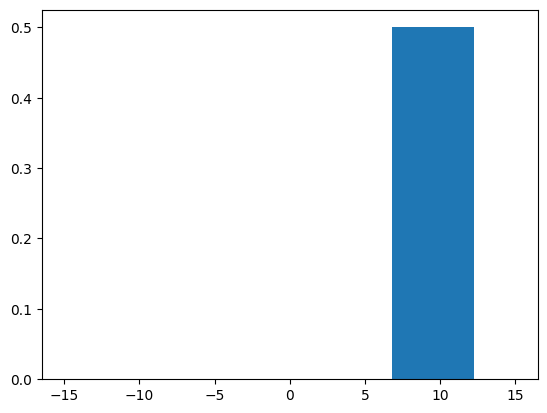

In [271]:
#weights = np.ones_like(df1.loc[246,'obstacle_intersect_nose_y'] -  
#df1.loc[246,'obstacle_edge_mid_y_cm'])/float(len(df1.loc[246,'obstacle_intersect_nose_y'] -  df1.loc[246,'obstacle_edge_mid_y_cm']))
row_weights = np.ones_like(df1.loc[246,'obstacle_intersect_nose_y'])/float(len(df1.loc[246,'obstacle_intersect_nose_y']))
counts,bins,bars = plt.hist((df1.loc[246,'obstacle_intersect_nose_y'] -  df1.loc[246,'obstacle_edge_mid_y_cm']),range=(-15,15),bins = 10 ,weights=row_weights)


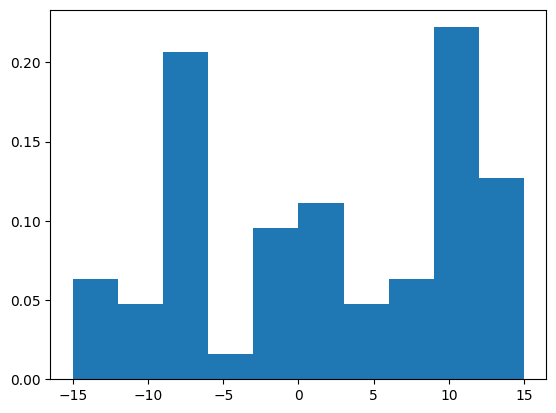

In [274]:
#weights = np.ones_like(df1.loc[249,'obstacle_intersect_nose_y'] -  
#df1.loc[249,'obstacle_edge_mid_y_cm'])/float(len(df1.loc[249,'obstacle_intersect_nose_y'] -  df1.loc[249,'obstacle_edge_mid_y_cm']))
row_weights = np.ones_like(df1.loc[249,'obstacle_intersect_nose_y'])/float(len(df1.loc[249,'obstacle_intersect_nose_y']))
counts1,bins1,bars1=plt.hist((df1.loc[249,'obstacle_intersect_nose_y'] -  df1.loc[249,'obstacle_edge_mid_y_cm']),range=(-15,15),bins = 10 ,weights=row_weights)


In [275]:
row_weights = np.ones_like(df1.loc[249,'obstacle_intersect_nose_y'])/float(len(df1.loc[249,'obstacle_intersect_nose_y']))
counts,bins = np.histogram((df1.loc[249,'obstacle_intersect_nose_y'] -  df1.loc[249,'obstacle_edge_mid_y_cm']),range=(-15,15),bins=10,weights=row_weights)

In [276]:
print(counts,bins)

[0.06349206349206349 0.047619047619047616 0.20634920634920634
 0.015873015873015872 0.09523809523809523 0.111111111111111
 0.04761904761904745 0.06349206349206327 0.22222222222222143
 0.12698412698412653] [-15.0 -12.0 -9.0 -6.0 -3.0 0.0 3.0 6.0 9.0 12.0 15.0]


In [258]:
print(counts,counts1)
print(sum(counts),sum(counts1))
print(bins,bins1)

[0.         0.         0.14814815 0.11111111 0.07407407 0.07407407
 0.03703704 0.14814815 0.22222222 0.18518519] [0.06349206 0.04761905 0.20634921 0.01587302 0.0952381  0.11111111
 0.04761905 0.06349206 0.22222222 0.12698413]
0.9999999999999993 0.9999999999999982
[-15. -12.  -9.  -6.  -3.   0.   3.   6.   9.  12.  15.] [-15. -12.  -9.  -6.  -3.   0.   3.   6.   9.  12.  15.]


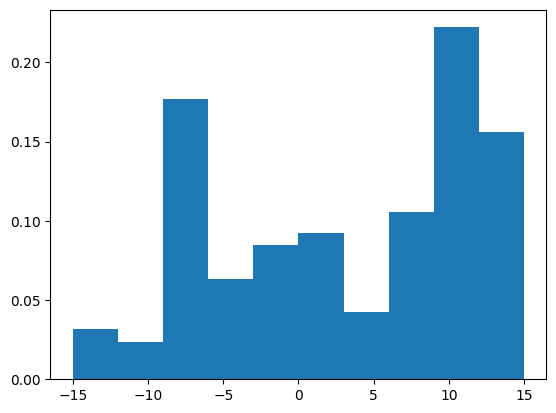

In [270]:
plt.stairs(x,bins1,fill=True)

In [336]:
row_weights = np.ones_like(row['obstacle_intersect_nose_y'])/float(len(row['obstacle_intersect_nose_y']))
counts,bins=np.histogram((row['obstacle_intersect_nose_y'] -  row['obstacle_edge_mid_y_cm']),range=(-15,15),bins = 10 ,weights=row_weights)
print(counts,bins,row['obstacle_intersect_nose_y'] -  row['obstacle_edge_mid_y_cm'])

[0.045454545454545456 0.8636363636363634 0.09090909090909083 0.0 0.0 0.0
 0.0 0.0 0.0 0.0] [-15.0 -12.0 -9.0 -6.0 -3.0 0.0 3.0 6.0 9.0 12.0 15.0] [-12.290412560677787 -11.561851042733707 -11.699253306023046
 -8.172007592049344 -9.602653094465019 -10.811589116992526
 -10.504209038938036 -10.946647455973764 -9.38528066808167
 -10.097188244715436 -9.019830671688712 -8.89348177910972
 -9.016329354045553 -9.531513328335325 -10.446815274871742
 -10.170745900690257 -10.039342736687292 -10.191788109340791
 -9.47175455873494 -9.334257402364145 -9.320975096729164 -9.80437448247265]


In [288]:
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    for ind,row in animal_frame.iterrows():
        row_weights = np.ones_like(row['obstacle_intersect_nose_y'])/float(len(row['obstacle_intersect_nose_y']))
        counts,bins=np.histogram((row['obstacle_intersect_nose_y'] -  row['obstacle_edge_mid_y_cm']),range=(-15,15),bins = 10 ,weights=row_weights)
        df.at[ind,'normalized_counts_intersect_nose_y'] = counts.astype('object')
        df.at[ind,'sum_normalized_counts_intersect_nose_y'] = float(sum(counts))
        df.at[ind,'bins_intersect_nose_y'] = bins.astype('object')
        

        

In [307]:
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_cluster =  animal_frame.groupby(['cluster_label'])
    for cluster,cluster_frame in by_cluster:
        by_direction = cluster_frame.groupby(['odd'])
        for direcetion,direction_frame in by_direction:
            mean_hist = np.mean(direction_frame['normalized_counts_intersect_nose_y'])
            for ind,row in direction_frame.iterrows():
                df.at[ind,'mean_normalized_counts_intersect_nose_y']=mean_hist.astype('object')
        

In [310]:
df.at[ind,'mean_normalized_counts_intersect_nose_y']

array([0.1151790133641313, 0.5863357453194113, 0.14689073781632755,
       0.07106559502203778, 0.025892316999395013, 0.007518796992481195,
       0.01979949874686715, 0.01503759398496239, 0.012280701754385956,
       0.0], dtype=object)

In [296]:
p = np.mean(df['normalized_counts_intersect_nose_y'])

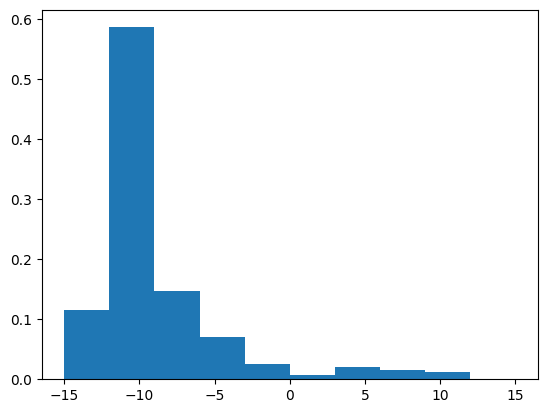

In [318]:
plt.stairs(df.at[ind,'mean_normalized_counts_intersect_nose_y'].astype('float'),df.at[ind,'bins_intersect_nose_y'].astype('float'),fill=True)

In [322]:
animal_frame.index[0]

245

In [331]:
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_mean_nose_y_intersect_hist'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_direction = animal_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
        if direction == False:
            fig.suptitle('Right Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            right_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in right_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.stairs(cluster_frame.at[cluster_frame.index[0],'mean_normalized_counts_intersect_nose_y'].astype('float'),cluster_frame.at[cluster_frame.index[0],'bins_intersect_nose_y'].astype('float'),fill=True)
            pdf.savefig(); plt.close()
        if direction ==True:
            fig.suptitle('Left Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            left_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in left_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.stairs(cluster_frame.at[cluster_frame.index[0],'mean_normalized_counts_intersect_nose_y'].astype('float'),cluster_frame.at[cluster_frame.index[0],'bins_intersect_nose_y'].astype('float'),fill=True)
            pdf.savefig(); plt.close()
pdf.close()

                
                
                
                
                
               



In [ ]:
## plot traces by cluster/animal
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_cluster_trace'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_direction = animal_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
        if direction == False:
            fig.suptitle('Right Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            right_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in right_by_cluster:
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    plt.gca().set_title(str(cluster))
                    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
               

        if direction ==True:
            fig.suptitle('Left Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            left_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in left_by_cluster:
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    plt.gca().set_title(str(cluster))
                    plt.subplot(3,3,cluster+1)
                    plt.gca().set_title(str(cluster))
                    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
            
pdf.close()


In [294]:
sum(np.mean(df['normalized_counts_intersect_nose_y']))

0.9635108481262338

In [253]:
test = np.full(3, np.nan)


In [255]:
test[0]

nan

(array([6., 2., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.00793651, 0.05916306, 0.11038961, 0.16161616, 0.21284271,
        0.26406926, 0.31529582, 0.36652237, 0.41774892, 0.46897547,
        0.52020202]),
 <BarContainer object of 10 artists>)

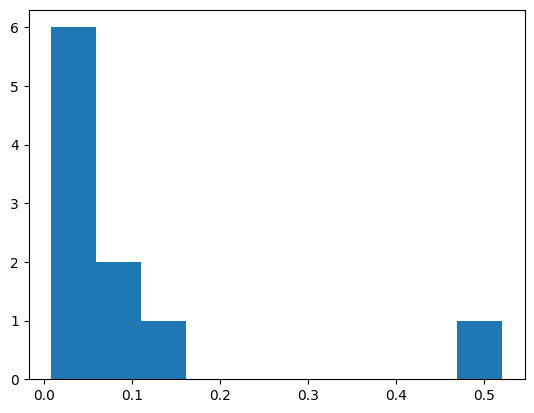

In [244]:
plt.hist(x)

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

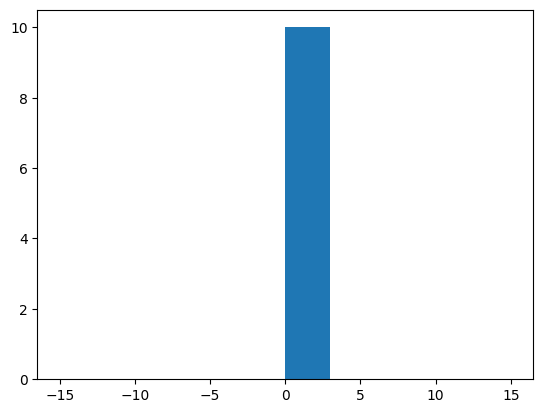

In [242]:
plt.hist(x,range=(-15,15),bins = 10)

In [193]:
len(df1.loc[249,'obstacle_intersect_nose_y'])

63

In [172]:
df1.loc[249,'obstacle_intersect_nose_y']

array([36.92206132205461, 36.8920031790052, 35.24364652909653,
       34.4387255428331, 27.550862834173085, 24.984613165536956,
       20.40493499704746, 21.969033829665506, 21.925753336035278,
       22.33586558589281, 23.27896655369868, 26.830392478443795,
       30.74272458081153, 33.25204560098878, 34.83200023805005,
       35.729707283000664, 36.65041512669295, 37.190065314979236,
       36.6948232212665, 35.78555374630312, 35.37097756105466,
       34.64272902581735, 36.12118772676522, 36.02415705745433,
       36.166468472919654, 37.5117461029536, 37.07382930960483,
       36.63642295928385, 35.61089114985155, 35.1964159472387,
       35.18893294839549, 34.407439399751304, 32.60773297848041,
       30.53676866828434, 28.799768704615396, 28.23037184421225,
       26.576437375612954, 25.151777349647315, 25.354433711764184,
       25.612821781928226, 25.3592291012609, 23.70868327035128,
       22.08279684581978, 16.892717767505246, 11.522128147860961,
       13.603076022545972, 12.

In [162]:
df1.loc[249,'all_obstacle_intersect_nose_y'][df1.loc[249,'all_obstacle_intersect_nose_y']!=0] 

array([36.92206132205461, 36.8920031790052, 35.24364652909653,
       34.4387255428331, 27.550862834173085, 24.984613165536956,
       20.40493499704746, 21.969033829665506, 21.925753336035278,
       22.33586558589281, 23.27896655369868, 26.830392478443795,
       30.74272458081153, 33.25204560098878, 34.83200023805005,
       35.729707283000664, 36.65041512669295, 37.190065314979236,
       36.6948232212665, 35.78555374630312, 35.37097756105466,
       34.64272902581735, 36.12118772676522, 36.02415705745433,
       36.166468472919654, 37.5117461029536, 37.07382930960483,
       36.63642295928385, 35.61089114985155, 35.1964159472387,
       35.18893294839549, 34.407439399751304, 32.60773297848041,
       30.53676866828434, 28.799768704615396, 28.23037184421225,
       26.576437375612954, 25.151777349647315, 25.354433711764184,
       25.612821781928226, 25.3592291012609, 23.70868327035128,
       22.08279684581978, 16.892717767505246, 11.522128147860961,
       13.603076022545972, 12.

In [ ]:



    fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
    fig.suptitle('Right Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
    by_label = animal_frame.groupby(['cluster_label'])
    for cluster,cluster_frame in by_label:
        plt.subplot(3,3,cluster+1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.gca().set_title(str(cluster_frame['cluster_label'].unique())+ '_' + str(len(cluster_frame)))
        plt.subplot(3,3,cluster+1)
        for ind,row in cluster_frame.iterrows():
            if row['odd'] == False:
                plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                    [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')
                plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                    [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
                plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                plt.ylim([52,0]); plt.xlim([0, 72])
                pdf.savefig(); plt.close()
            if row['odd'] == True:

            
             
    
    


In [ ]:
## plot traces by cluster/animal
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_cluster_trace'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))



fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
fig.suptitle('Right Start'+'_'+str(self.df['animal'].unique()), size = 20)



In [ ]:
## plot traces by cluster/animal
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_cluster_trace'
filename

pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
fig.suptitle('Right Start'+'_'+str(self.df['animal'].unique()), size = 20)
for clusters, cluster_name in enumerate(self.df['obstacle_cluster'].unique()):
    x=self.df.loc[self.df['obstacle_cluster']==cluster_name]
    for i, row in x.iterrows():
        if row['odd'] == False:
            plt.subplot(3,3,cluster_name+1)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_title(str(row['obstacle_cluster'])
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red'
            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green'
            plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
            #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
            plt.ylim([52,0]); plt.xlim([0, 72])
pdf.savefig(); plt.close()

fig, ax = plt.subplots(3,3, figsize=(25,21),dpi = 50)
fig.suptitle('Left Start'+'_'+str(self.df['animal'].unique()), size = 20)
for clusters, cluster_name in enumerate(self.df['obstacle_cluster'].unique()):
    x=self.df.loc[self.df['obstacle_cluster']==cluster_name]
    for i, row in x.iterrows():
        if row['odd'] == True:
            plt.subplot(3,3,cluster_name+1)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_title(str(row['obstacle_cluster'])
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red'
            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                        [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




            plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
            #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
            plt.ylim([52,0]); plt.xlim([0, 72])
#pdf.savefig(); plt.close()
#pdf.close()


